In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# make function to calculate power
def calc_power(time, I_u, I_v, I_w, V_u, V_v, V_w):
    thresh = 0.
    buf_u = np.asarray(I_u) - thresh
    buf_v = np.asarray(I_v) - thresh
    buf_w = np.asarray(I_w) - thresh

    # thresholdを下から上に跨ぐ時だけ取り出す
    cross_num_u = np.sum((buf_u[:-1] < 0) & (buf_u[1:] > 0))
    cross_idx_u = np.where((buf_u[:-1] < 0) & (buf_u[1:] > 0))[0]
    cross_num_v = np.sum((buf_v[:-1] < 0) & (buf_v[1:] > 0))
    cross_idx_v = np.where((buf_v[:-1] < 0) & (buf_v[1:] > 0))[0]
    cross_num_w = np.sum((buf_w[:-1] < 0) & (buf_w[1:] > 0))
    cross_idx_w = np.where((buf_w[:-1] < 0) & (buf_w[1:] > 0))[0]

    # proc_intervalの中に1周期以上入るとき->初めの1周期を取り出してPを計算
    if cross_num_u >= 2 and cross_num_v >= 2 and cross_num_w >= 2:
        P_u = np.mean(I_u[cross_idx_u[0]:cross_idx_u[1]] * V_u[cross_idx_u[0]:cross_idx_u[1]])
        P_v = np.mean(I_v[cross_idx_v[0]:cross_idx_v[1]] * V_v[cross_idx_v[0]:cross_idx_v[1]])
        P_w = np.mean(I_w[cross_idx_w[0]:cross_idx_w[1]] * V_w[cross_idx_w[0]:cross_idx_w[1]])
        P_tot = P_u + P_v + P_w

    # proc_intervalの中に1周期入らないとき->proc_interval全体でPを計算
    else:
        P_u = np.mean(I_u * V_u)
        P_v = np.mean(I_v * V_v)
        P_w = np.mean(I_w * V_w)
        P_tot = P_u + P_v + P_w

    return time,P_u,P_v,P_w,P_tot

## Constant Frequency (1 Hz)

In [18]:
proc_interval = 0.125
sample_rate = 100_000

#mock data (freq is constant)
time = np.arange(0, proc_interval, 1/sample_rate, dtype=np.float32)

def sine_wave(time, A, omega, phase):
    return A*np.sin(omega*time + phase)

I_u = sine_wave(time, 0.3, 2*np.pi*36, 0)
I_v = sine_wave(time, 0.3, 2*np.pi*36, 2*np.pi/3)
I_w = sine_wave(time, 0.3, 2*np.pi*36, 4*np.pi/3)

V_u = sine_wave(time, 1.0, 2*np.pi*36, np.pi/8)
V_v = sine_wave(time, 1.0, 2*np.pi*36, np.pi/8+2*np.pi/3)
V_w = sine_wave(time, 1.0, 2*np.pi*36, np.pi/8+4*np.pi/3)

In [19]:
result = calc_power(time, I_u, I_v, I_w, V_u, V_v, V_w)
print('P_tot=', result[4])

P_tot= 0.4157125


In [20]:
thresh = 0.
buf_u = np.asarray(I_u) - thresh
buf_v = np.asarray(I_v) - thresh
buf_w = np.asarray(I_w) - thresh
cross_num_u = np.sum((buf_u[:-1] < 0) & (buf_u[1:] > 0))
cross_idx_u = np.where((buf_u[:-1] < 0) & (buf_u[1:] > 0))[0]
cross_num_v = np.sum((buf_v[:-1] < 0) & (buf_v[1:] > 0))
cross_idx_v = np.where((buf_v[:-1] < 0) & (buf_v[1:] > 0))[0]
cross_num_w = np.sum((buf_w[:-1] < 0) & (buf_w[1:] > 0))
cross_idx_w = np.where((buf_w[:-1] < 0) & (buf_w[1:] > 0))[0]

print(f"Number of crossings (U): {cross_num_u}")
print(f"Crossing indices (U): {cross_idx_u}")
print(f"Number of crossings (V): {cross_num_v}")
print(f"Crossing indices (V): {cross_idx_v}")
print(f"Number of crossings (W): {cross_num_w}")
print(f"Crossing indices (W): {cross_idx_w}")

Number of crossings (U): 4
Crossing indices (U): [ 2777  5555  8333 11111]
Number of crossings (V): 4
Crossing indices (V): [ 1851  4629  7407 10185]
Number of crossings (W): 5
Crossing indices (W): [  925  3703  6481  9259 12037]


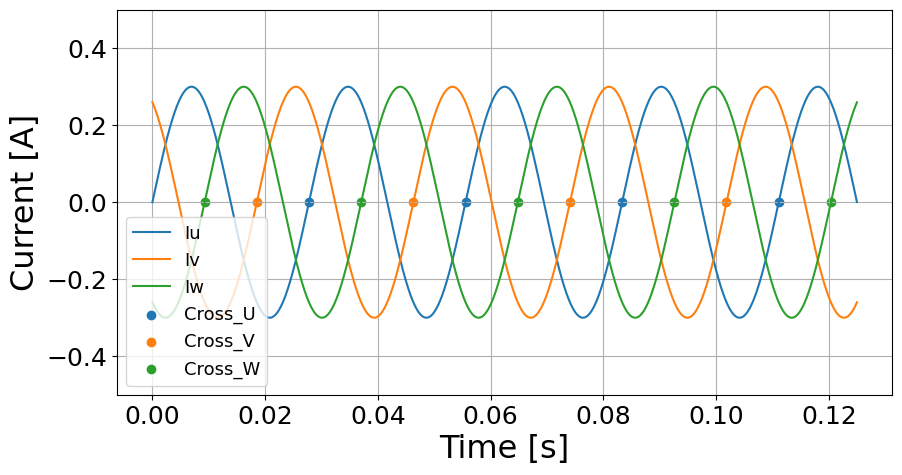

In [21]:
fig = plt.figure(figsize = (10,5))

plt.plot(time, I_u, label='Iu')
plt.plot(time, I_v, label='Iv')
plt.plot(time, I_w, label='Iw')
plt.scatter(time[cross_idx_u], I_u[cross_idx_u], label='Cross_U')
plt.scatter(time[cross_idx_v], I_v[cross_idx_v], label='Cross_V')
plt.scatter(time[cross_idx_w], I_w[cross_idx_w], label='Cross_W')

#plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=23)
plt.ylabel('Current [A]',fontsize=23)
plt.tick_params(labelsize = 18)
#plt.xlim(0,100)
plt.ylim(-0.5,0.5)
plt.legend(fontsize=13)
plt.grid()
#print(len(B_signal_list))
plt.show()

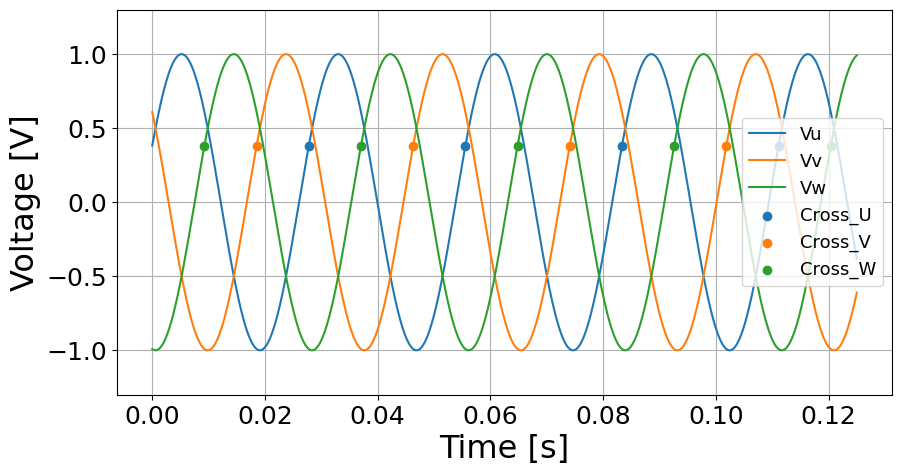

In [22]:
fig = plt.figure(figsize = (10,5))

plt.plot(time, V_u, label='Vu')
plt.plot(time, V_v, label='Vv')
plt.plot(time, V_w, label='Vw')
plt.scatter(time[cross_idx_u], V_u[cross_idx_u], label='Cross_U')
plt.scatter(time[cross_idx_v], V_v[cross_idx_v], label='Cross_V')
plt.scatter(time[cross_idx_w], V_w[cross_idx_w], label='Cross_W')

#plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=23)
plt.ylabel('Voltage [V]',fontsize=23)
plt.tick_params(labelsize = 18)
#plt.xlim(0,100)
plt.ylim(-1.3,1.3)
plt.legend(fontsize=13)
plt.grid()
#print(len(B_signal_list))
plt.show()

## Slow rotation (~0.11 Hz)

In [23]:
proc_interval = 0.125
sample_rate = 100_000

#mock data (freq is constant)
time = np.arange(0, proc_interval, 1/sample_rate, dtype=np.float32)

def sine_wave(time, A, omega, phase):
    return A*np.sin(omega*time + phase)

Is_u = sine_wave(time, 0.3, 2*np.pi*4, 0)
Is_v = sine_wave(time, 0.3, 2*np.pi*4, 2*np.pi/3)
Is_w = sine_wave(time, 0.3, 2*np.pi*4, 4*np.pi/3)

Vs_u = sine_wave(time, 1.0, 2*np.pi*4, np.pi/8)
Vs_v = sine_wave(time, 1.0, 2*np.pi*4, np.pi/8+2*np.pi/3)
Vs_w = sine_wave(time, 1.0, 2*np.pi*4, np.pi/8+4*np.pi/3)

In [24]:
result = calc_power(time, Is_u, Is_v, Is_w, Vs_u, Vs_v, Vs_w)
print('P_tot=', result[4])

P_tot= 0.4157458


In [25]:
thresh = 0.
buf_s_u = np.asarray(Is_u) - thresh
buf_s_v = np.asarray(Is_v) - thresh
buf_s_w = np.asarray(Is_w) - thresh
cross_s_num_u = np.sum((buf_s_u[:-1] < 0) & (buf_s_u[1:] > 0))
cross_s_idx_u = np.where((buf_s_u[:-1] < 0) & (buf_s_u[1:] > 0))[0]
cross_s_num_v = np.sum((buf_s_v[:-1] < 0) & (buf_s_v[1:] > 0))
cross_s_idx_v = np.where((buf_s_v[:-1] < 0) & (buf_s_v[1:] > 0))[0]
cross_s_num_w = np.sum((buf_s_w[:-1] < 0) & (buf_s_w[1:] > 0))
cross_s_idx_w = np.where((buf_s_w[:-1] < 0) & (buf_s_w[1:] > 0))[0]

print(f"Number of crossings (U): {cross_s_num_u}")
print(f"Crossing indices (U): {cross_s_idx_u}")
print(f"Number of crossings (V): {cross_s_num_v}")
print(f"Crossing indices (V): {cross_s_idx_v}")
print(f"Number of crossings (W): {cross_s_num_w}")
print(f"Crossing indices (W): {cross_s_idx_w}")

Number of crossings (U): 0
Crossing indices (U): []
Number of crossings (V): 0
Crossing indices (V): []
Number of crossings (W): 1
Crossing indices (W): [8333]


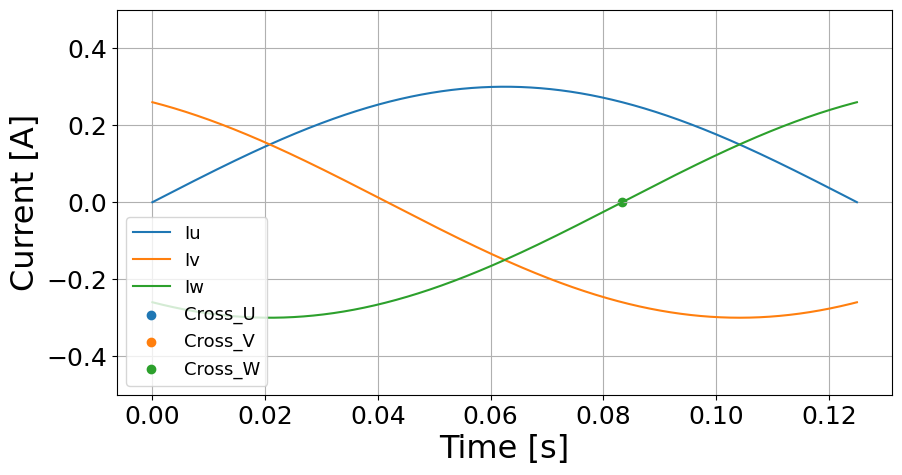

In [26]:
fig = plt.figure(figsize = (10,5))

plt.plot(time, Is_u, label='Iu')
plt.plot(time, Is_v, label='Iv')
plt.plot(time, Is_w, label='Iw')
plt.scatter(time[cross_s_idx_u], Is_u[cross_s_idx_u], label='Cross_U')
plt.scatter(time[cross_s_idx_v], Is_v[cross_s_idx_v], label='Cross_V')
plt.scatter(time[cross_s_idx_w], Is_w[cross_s_idx_w], label='Cross_W')

#plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=23)
plt.ylabel('Current [A]',fontsize=23)
plt.tick_params(labelsize = 18)
#plt.xlim(0,100)
plt.ylim(-0.5,0.5)
plt.legend(fontsize=13)
plt.grid()
#print(len(B_signal_list))
plt.show()

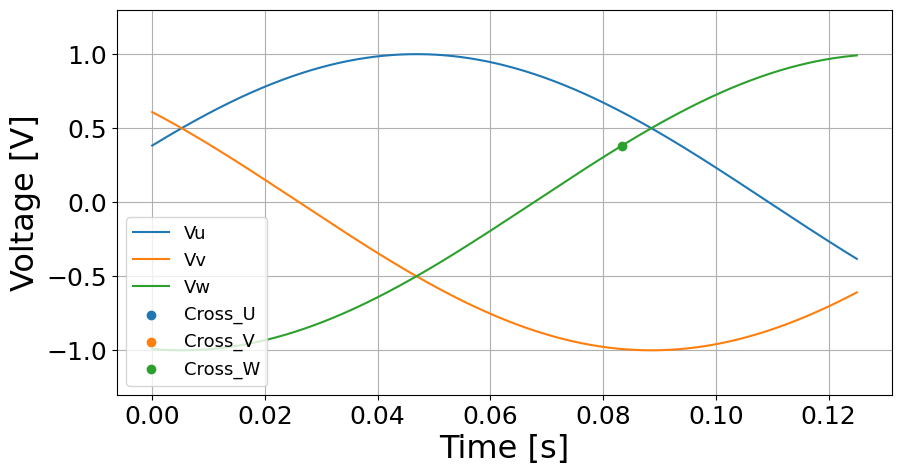

In [27]:
fig = plt.figure(figsize = (10,5))

plt.plot(time, Vs_u, label='Vu')
plt.plot(time, Vs_v, label='Vv')
plt.plot(time, Vs_w, label='Vw')
plt.scatter(time[cross_s_idx_u], Vs_u[cross_s_idx_u], label='Cross_U')
plt.scatter(time[cross_s_idx_v], Vs_v[cross_s_idx_v], label='Cross_V')
plt.scatter(time[cross_s_idx_w], Vs_w[cross_s_idx_w], label='Cross_W')

#plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=23)
plt.ylabel('Voltage [V]',fontsize=23)
plt.tick_params(labelsize = 18)
#plt.xlim(0,100)
plt.ylim(-1.3,1.3)
plt.legend(fontsize=13)
plt.grid()
#print(len(B_signal_list))
plt.show()

## Chirp Signal

In [28]:
def chirp_wave(t,a,b,amp,phase):
    f = a*t + b
    y = amp*np.sin(2.*np.pi*f*t+phase)
    return y,f

Ic_u = chirp_wave(time, 0.1, 0, 0.3, 0)[0]
Ic_v = chirp_wave(time, 0.1, 0, 0.3, 2*np.pi/3)[0]
Ic_w = chirp_wave(time, 0.1, 0, 0.3, 4*np.pi/3)[0]

Vc_u = chirp_wave(time, 0.1, 0, 1.0, np.pi/8)[0]
Vc_v = chirp_wave(time, 0.1, 0, 1.0, np.pi/8+2*np.pi/3)[0]
Vc_w = chirp_wave(time, 0.1, 0, 1.0, np.pi/8+4*np.pi/3)[0]

result = calc_power(time, Ic_u, Ic_v, Ic_w, Vc_u, Vc_v, Vc_w)
print('P_tot=', result[4])

P_tot= 0.41574582


In [29]:
thresh = 0.
buf_c_u = np.asarray(Ic_u) - thresh
buf_c_v = np.asarray(Ic_v) - thresh
buf_c_w = np.asarray(Ic_w) - thresh
cross_c_num_u = np.sum((buf_c_u[:-1] < 0) & (buf_c_u[1:] > 0))
cross_c_idx_u = np.where((buf_c_u[:-1] < 0) & (buf_c_u[1:] > 0))[0]
cross_c_num_v = np.sum((buf_c_v[:-1] < 0) & (buf_c_v[1:] > 0))
cross_c_idx_v = np.where((buf_c_v[:-1] < 0) & (buf_c_v[1:] > 0))[0]
cross_c_num_w = np.sum((buf_c_w[:-1] < 0) & (buf_c_w[1:] > 0))
cross_c_idx_w = np.where((buf_c_w[:-1] < 0) & (buf_c_w[1:] > 0))[0]

print(f"Number of crossings (U): {cross_c_num_u}")
print(f"Crossing indices (U): {cross_c_idx_u}")
print(f"Number of crossings (V): {cross_c_num_v}")
print(f"Crossing indices (V): {cross_c_idx_v}")
print(f"Number of crossings (W): {cross_c_num_w}")
print(f"Crossing indices (W): {cross_c_idx_w}")

Number of crossings (U): 0
Crossing indices (U): []
Number of crossings (V): 0
Crossing indices (V): []
Number of crossings (W): 0
Crossing indices (W): []


ValueError: x and y must have same first dimension, but have shapes (1000000,) and (12500,)

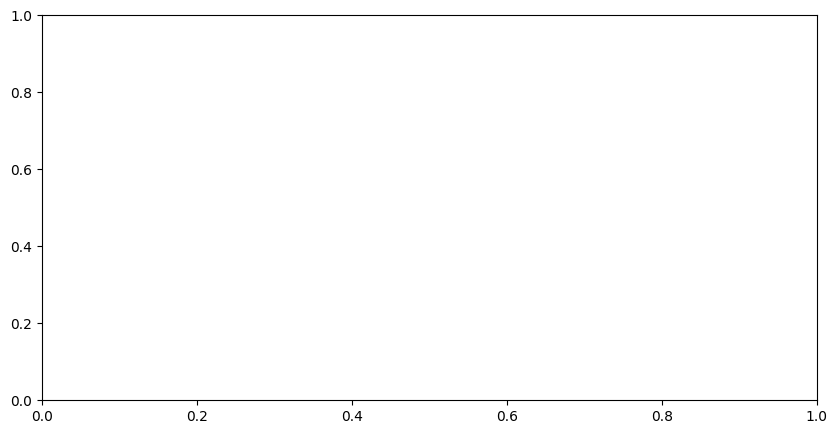

In [30]:
time = np.arange(0, 10, 1/sample_rate, dtype=np.float32)

fig = plt.figure(figsize = (10,5))

plt.plot(time, Ic_u, label='I_u')
plt.plot(time, Ic_v, label='I_v')
plt.plot(time, Ic_w, label='I_w')
plt.scatter(time[cross_c_idx_u], Ic_u[cross_c_idx_u], label='Cross_U')
plt.scatter(time[cross_c_idx_v], Ic_v[cross_c_idx_v], label='Cross_V')
plt.scatter(time[cross_c_idx_w], Ic_w[cross_c_idx_w], label='Cross_W')

#plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=23)
plt.ylabel('Current [A]',fontsize=23)
plt.tick_params(labelsize = 18)
#plt.xlim(0,100)
#plt.ylim(-0.5,0.5)
plt.legend(fontsize=13)
plt.grid()
#print(len(B_signal_list))
plt.show()

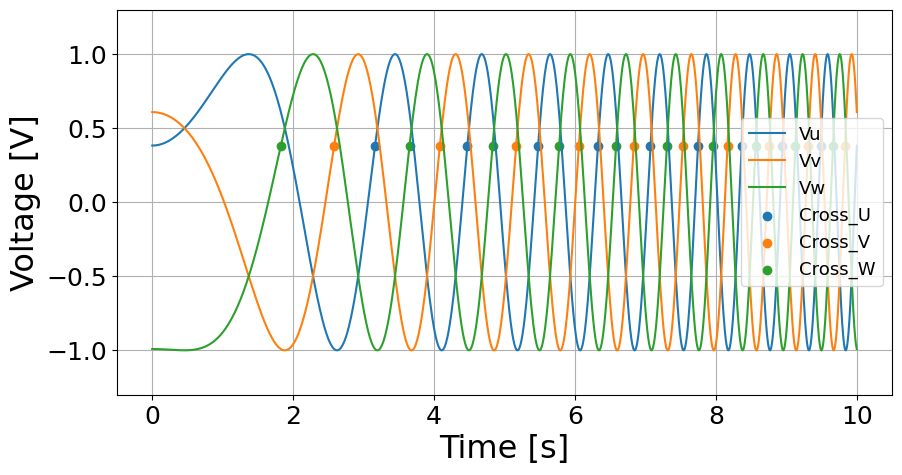

In [ ]:
fig = plt.figure(figsize = (10,5))

plt.plot(time, Vc_u, label='Vu')
plt.plot(time, Vc_v, label='Vv')
plt.plot(time, Vc_w, label='Vw')
plt.scatter(time[cross_c_idx_u], Vc_u[cross_c_idx_u], label='Cross_U')
plt.scatter(time[cross_c_idx_v], Vc_v[cross_c_idx_v], label='Cross_V')
plt.scatter(time[cross_c_idx_w], Vc_w[cross_c_idx_w], label='Cross_W')

#plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=23)
plt.ylabel('Voltage [V]',fontsize=23)
plt.tick_params(labelsize = 18)
#plt.xlim(0,100)
plt.ylim(-1.3,1.3)
plt.legend(fontsize=13)
plt.grid()
#print(len(B_signal_list))
plt.show()